In [7]:
# Import libraries
import pandas as pd

# Load the dataset with correct encoding
df = pd.read_csv("Global_Superstore.csv", encoding='latin1')

# ---------------------------------------
# Step 1: Basic Overview
# ---------------------------------------
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.info())
print(df.isnull().sum())

# ---------------------------------------
# Step 2: Drop Unnecessary Columns
# ---------------------------------------
# We'll drop 'Row ID' and 'Postal Code' (Postal Code has 80% missing)
df.drop(columns=['Row ID', 'Postal Code'], inplace=True)

# ---------------------------------------
# Step 3: Remove Duplicates
# ---------------------------------------
df.drop_duplicates(inplace=True)

# ---------------------------------------
# Step 4: Convert Dates
# ---------------------------------------
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# ---------------------------------------
# Step 5: Clean Column Names (optional but useful for dashboard)
# ---------------------------------------
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('-', '_')

# Final Preview
print("Cleaned Columns:", df.columns)
df.head()


Shape: (51290, 24)
Columns: Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   S

/tmp/ipython-input-7-843186366.py:29: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
/tmp/ipython-input-7-843186366.py:30: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,State,Country,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


🔹 Total Sales: $ 12642501.91
🔹 Total Profit: $ 1467457.29


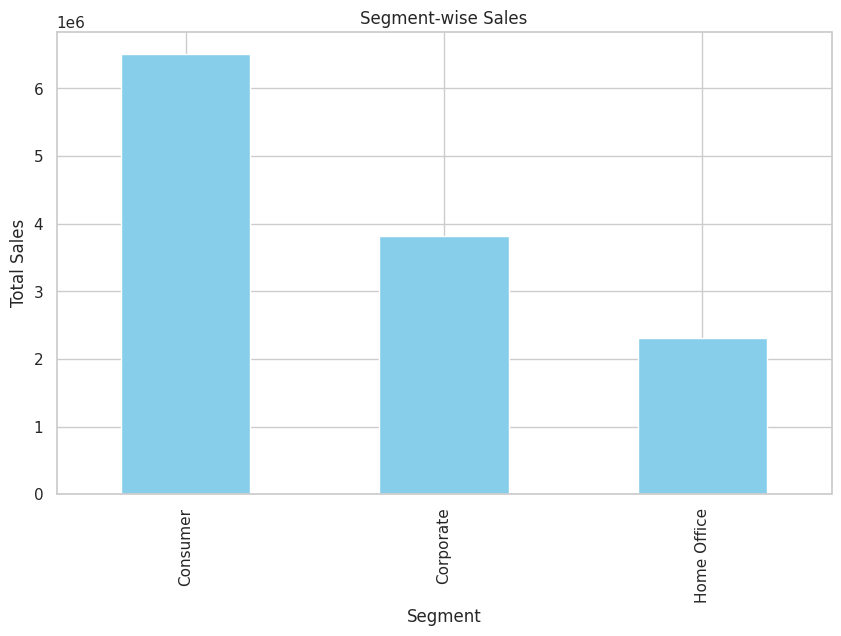

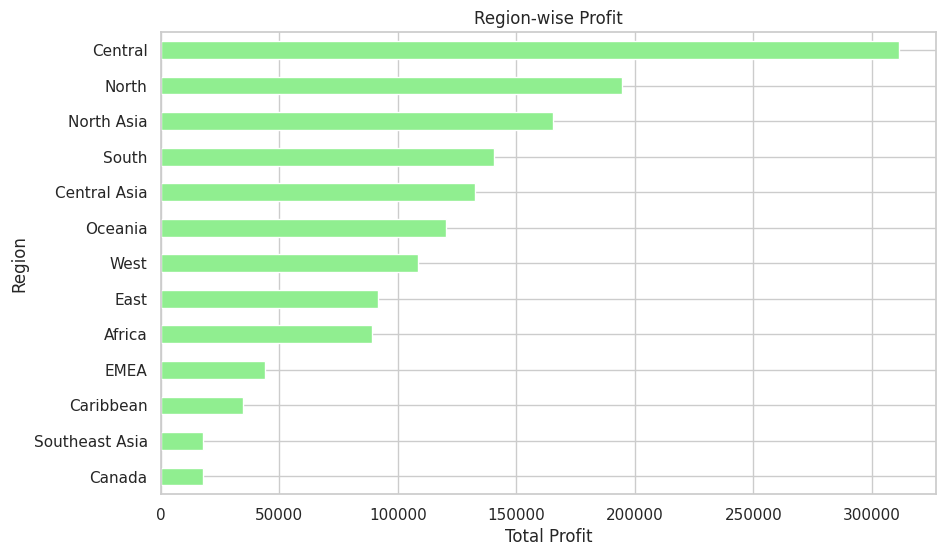

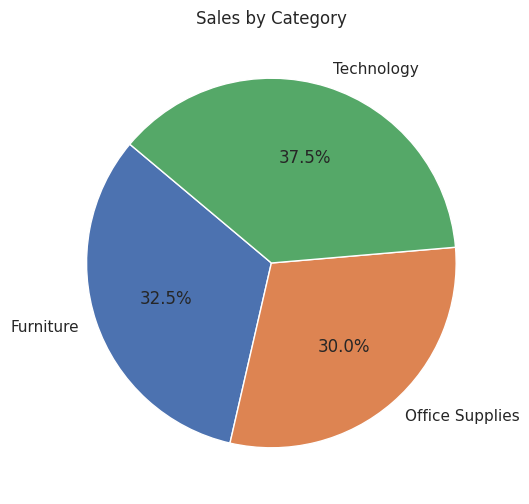

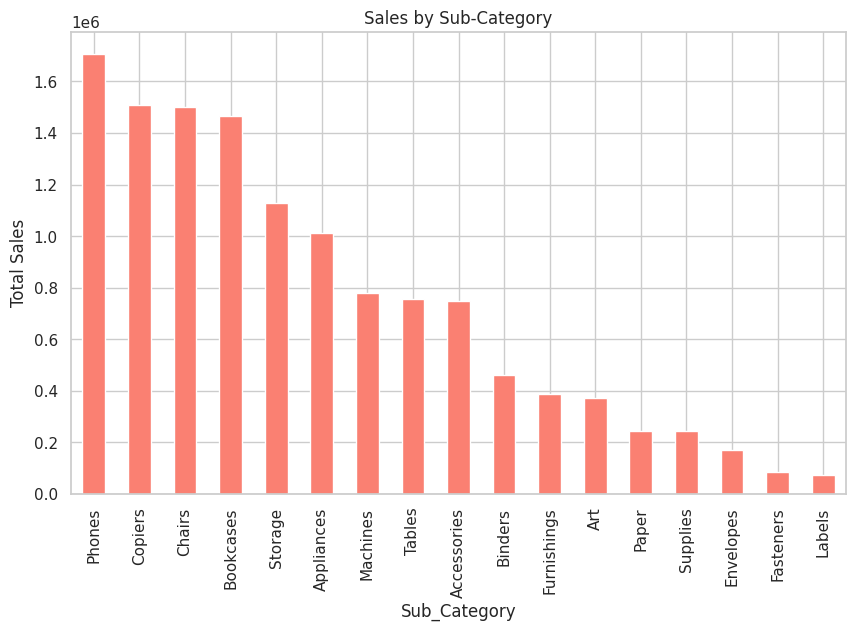

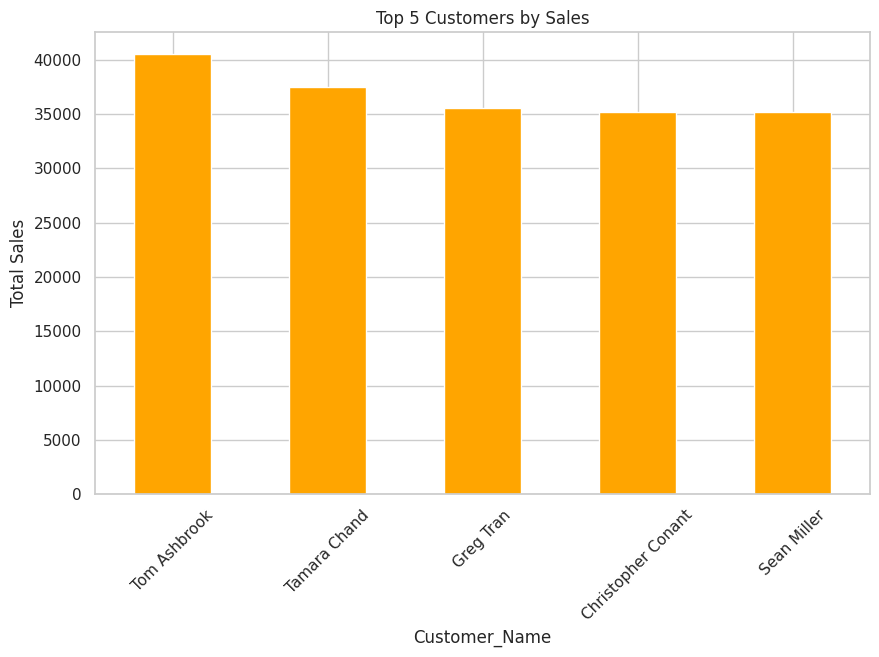

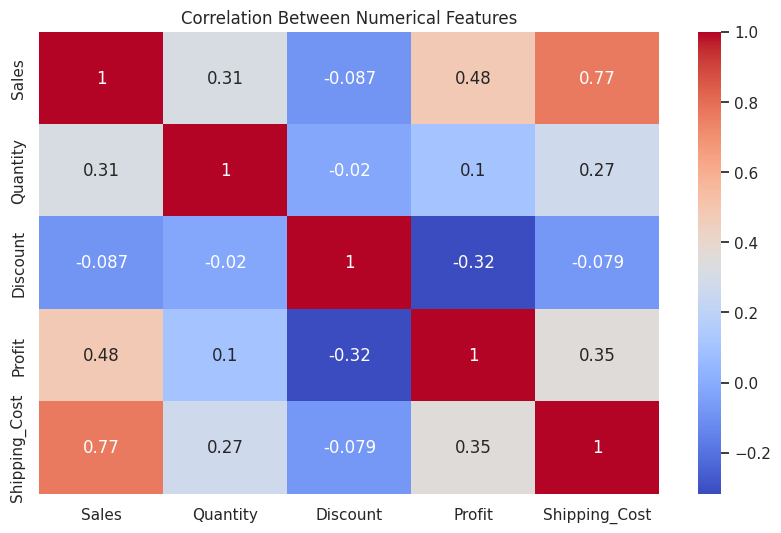

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# ----------------------------------------
# Total Sales & Profit
# ----------------------------------------
print("🔹 Total Sales: $", round(df['Sales'].sum(), 2))
print("🔹 Total Profit: $", round(df['Profit'].sum(), 2))

# ----------------------------------------
# Segment-wise Sales
# ----------------------------------------
seg_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
seg_sales.plot(kind='bar', color='skyblue', title='Segment-wise Sales')
plt.ylabel('Total Sales')
plt.show()

# ----------------------------------------
# Region-wise Profit
# ----------------------------------------
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
region_profit.plot(kind='barh', color='lightgreen', title='Region-wise Profit')
plt.xlabel('Total Profit')
plt.show()

# ----------------------------------------
# Category/Sub-Category Sales
# ----------------------------------------
cat_sales = df.groupby('Category')['Sales'].sum()
subcat_sales = df.groupby('Sub_Category')['Sales'].sum().sort_values(ascending=False)

cat_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, title='Sales by Category')
plt.ylabel('')
plt.show()

subcat_sales.plot(kind='bar', color='salmon', title='Sales by Sub-Category')
plt.ylabel('Total Sales')
plt.show()

# ----------------------------------------
# Top 5 Customers by Sales
# ----------------------------------------
top_customers = df.groupby('Customer_Name')['Sales'].sum().sort_values(ascending=False).head(5)
top_customers.plot(kind='bar', color='orange', title='Top 5 Customers by Sales')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# ----------------------------------------
# Correlation Heatmap
# ----------------------------------------
numeric_cols = ['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping_Cost']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.show()
